In [7]:
from netgen.geom2d import SplineGeometry
from ngsolve import Mesh, NodeId, VERTEX, ElementId, VOL
import matplotlib.pyplot as plt 
import numpy as np
from typing import Optional

In [8]:
L = 1
H = 0.2

geo = SplineGeometry()
geo.AddRectangle(p1=(-L/2,-H/2),
                 p2=( L/2, H/2),)
geo.SetMaterial (1, "background")

Omega = Mesh( geo.GenerateMesh(maxh=0.4) )

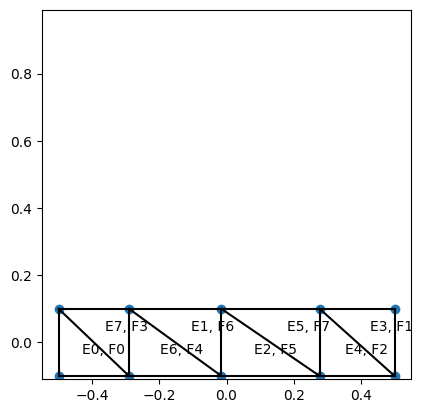

In [11]:
def plot_mesh( M : Mesh, ax : Optional[plt.Axes] = None ): 
    """Plots a mesh"""
    points = np.fromiter( (v.point for v in M.vertices), dtype=np.dtype((float, 2)), count=M.nv)
    
    if ax is None:
        _, ax = plt.subplots()
    for l in M.edges:
        px, py = points[l.vertices[0].nr]
        qx, qy = points[l.vertices[1].nr]
        ax.plot( [px, qx], [py, qy], 'k')

    ax.scatter(x=points[:,0], y=points[:,1])

    # for f in M.faces:
    #     px, py  = points[f.vertices[0].nr]
    #     qx, qy  = points[f.vertices[1].nr]
    #     rx, ry  = points[f.vertices[2].nr]
    #     mx, my  = 1/3*(px +qx + rx), 1/3*(py + qy + ry)
    #     ax.text( mx, my, str(f))

    for e in M.Elements():
        f = e.faces[0]
        px, py  = points[e.vertices[0].nr]
        qx, qy  = points[e.vertices[1].nr]
        rx, ry  = points[e.vertices[2].nr]
        mx, my  = 1/3*(px +qx + rx), 1/3*(py + qy + ry)
        ax.text( mx, my, f"E{e.nr}, {str(f)}")


    ax.axis('square')

plot_mesh(Omega)

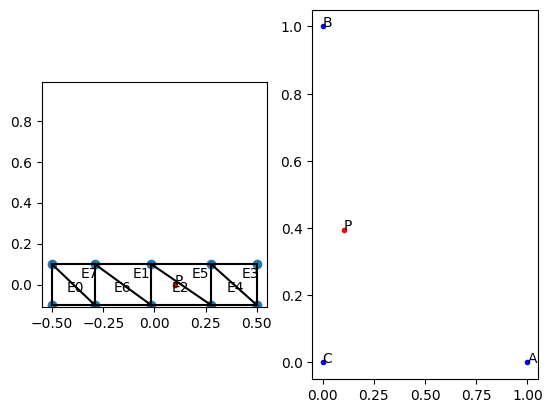

In [19]:
def explore_mapping( x : float, y : float,  M : Mesh, ax : Optional[plt.Axes] = None ):
    """Plots a point in the mesh as well as in the reference domain."""
    points = np.fromiter( (v.point for v in M.vertices), dtype=np.dtype((float, 2)), count=M.nv)
    
    if ax is None:
        _, ( ax_l, ax_r ) = plt.subplots(ncols=2)
    
    for l in M.edges:
        px, py = points[l.vertices[0].nr]
        qx, qy = points[l.vertices[1].nr]
        ax_l.plot( [px, qx], [py, qy], 'k')

    ax_l.scatter(x=points[:,0], y=points[:,1])

    
    for e in M.Elements():
        px, py  = points[e.vertices[0].nr]
        qx, qy  = points[e.vertices[1].nr]
        rx, ry  = points[e.vertices[2].nr]
        mx, my  = 1/3*(px +qx + rx), 1/3*(py + qy + ry)
        ax_l.text( mx, my, f"E{e.nr}")

    ax_l.axis('square')
    ax_l.plot(x,y,'.r')
    ax_l.text(x,y,'P')

    mp = Omega(x,y)
    e_ID = mp.nr
    x_r, y_r, _ = mp.pnt

    # Reference domain

    ax_r.plot(1,0,'.b')
    ax_r.text(1,0,'A')

    ax_r.plot(0,1,'.b')
    ax_r.text(0,1,'B')

    ax_r.plot(0,0,'.b')
    ax_r.text(0,0,'C')

    ax_r.plot(x_r, y_r, '.r')
    ax_r.text(x_r, y_r, 'P')



explore_mapping( 0.1, 0,  Omega )

In [18]:
def eval_func( x : float, y : float, Omega : Mesh, u,  ):
    mp = Omega( x, y)
    e_ID = mp.nr
    a, b, c = mp.pnt

In [20]:
Elements = [ e for e in Omega.Elements()]

In [122]:
pnt = (0.4, -0.05)
mp = Omega(*pnt)
mp.nr

4

In [123]:
x, y, _ = mp.pnt
p =  np.array(Omega.vertices[Elements[mp.nr].vertices[0].nr].point)
q =  np.array(Omega.vertices[Elements[mp.nr].vertices[1].nr].point)
r =  np.array(Omega.vertices[Elements[mp.nr].vertices[2].nr].point)
x, y

(0.5518364211652815, 0.25)

In [124]:
p, q, r

(array([ 0.5, -0.1]),
 array([0.27686719, 0.1       ]),
 array([ 0.27686719, -0.1       ]))

In [125]:
f_p = lambda x, y : x
f_q = lambda x, y : y
f_r = lambda x, y : 1 - x - y

In [126]:
p*f_p(x,y) + q*f_q(x,y) + r*f_r(x,y)

array([ 0.4 , -0.05])